# 1. Importação de Bibliotecas

In [1]:
import warnings
import pandas as pd
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm, probplot, pearsonr, power_divergence
warnings.filterwarnings("ignore")
import seaborn as sns
import plotly.express as px

In [2]:
def minutos_inteiro(coluna):
    lista = []
    for i in coluna:
        try: 
            if int(i) < 10:
                a = f'0{int(i)}'
                lista.append(str(a))
            elif int(i) > 90:
                a = f'9{int(i)}'
                lista.append(str(a))
            else: 
                lista.append(i)
        except: 
            lista.append(str(i))
    return pd.Series(str(j) for j in lista)

# 2. Carregamento de Dados

In [3]:
dados_cr7 = pd.read_csv('cr7.csv')
dados_messi = pd.read_csv('messi.csv')
data = pd.read_csv('data.csv')

# 3. Familiarização com as Tabelas

In [4]:
print('CR7:')
display(dados_cr7.head(5))
print('\nMessi:')
display(dados_messi.head(5))
print('\nMessi e CR7:')
display(data.head(5))

CR7:


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN



Messi:


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho



Messi e CR7:


,Player,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,Cristiano Ronaldo,02/03,Liga Portugal,8,2002-10-26,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,Cristiano Ronaldo,02/03,Taca de Portugal Placard,Fourth Round,2002-11-24,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,Cristiano Ronaldo,02/03,Taca de Portugal Placard,Fifth Round,2002-12-18,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


# 4. Regularização de tabelas

## 4.1 Messi

### 4.1.1 Competição


In [5]:
display(dados_messi['Competition'].drop_duplicates())
print()
display(dados_messi[dados_messi['Competition'] == 'Champions League'])
print()
display(dados_messi[dados_messi['Competition'] == 'Troph�e des Champions'])
print()
display(dados_messi[dados_messi['Competition'] == 'Trophée des Champions'])
print()
dados_messi['Competition'][690] = 'UEFA Champions League'
dados_messi.drop(686,inplace=True)
print()
display(dados_messi[dados_messi['Competition'] == 'Champions League'])
print()
display(dados_messi[dados_messi['Competition'] == 'Troph�e des Champions'])
print()
display(dados_messi[dados_messi['Competition'] == 'Trophée des Champions'])
print()

0                     LaLiga
1      UEFA Champions League
7               Copa del Rey
80                 Supercopa
94       FIFA Club World Cup
183           UEFA Super Cup
675                  Ligue 1
683    Trophée des Champions
686    Troph�e des Champions
690         Champions League
Name: Competition, dtype: object

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
690,22/23,Champions League,Group Stage,9/14/22,A,Paris Saint-Germain,Maccabi Haifa,1:03,SS,37,1:01,Left-footed shot,NaN


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
686,22/23,Troph�e des Champions,Final,7/31/22,H,Paris Saint-Germain,FC Nantes,4:00,CF,22,1:00,Right-footed shot,NaN


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
683,21/22,Trophée des Champions,Final,7/31/22,H,Paris Saint-Germain,FC Nantes,4:00,CF,22,1:00,Right-footed shot,NaN


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
683,21/22,Trophée des Champions,Final,7/31/22,H,Paris Saint-Germain,FC Nantes,4:00,CF,22,1:00,Right-footed shot,NaN


### 4.1.2 Result

In [6]:
print(dados_messi[dados_messi['Venue'] == 'A']['Result'])

for i in dados_messi[dados_messi['Venue'] == 'A']['Result'].index:
    result = dados_messi['Result'][i].split(':')
    try:
        dados_messi['Result'][i] = f'{int(result[1])}:{int(result[0])}'
    except:
        result1 = result[1].split(' ')
        dados_messi['Result'][i] = f'{result1[0]}:{result[0]} {result1[1]}'
print(dados_messi[dados_messi['Venue'] == 'A']['Result'])

5      0:03
6      0:03
9      2:03
11     1:01
16     0:04
       ... 
689    1:07
690    1:03
691    0:01
693     1:1
694     0:3
Name: Result, Length: 282, dtype: object
5      3:0
6      3:0
9      3:2
11     1:1
16     4:0
      ... 
689    7:1
690    3:1
691    1:0
693    1:1
694    3:0
Name: Result, Length: 282, dtype: object


### 4.1.3 At_score

In [7]:
for i in dados_messi[dados_messi['Venue'] == 'A']['At_score'].index:
    At_score = dados_messi['At_score'][i].split(':')
    try:
        dados_messi['At_score'][i] = f'{int(At_score[1])}:{int(At_score[0])}'
    except:
        dados_messi['At_score'][i] = f'{At_score[1]}:{At_score[0]}'

### 4.1.4 Season

In [8]:
for i in dados_messi[dados_messi['Season'] == '11-Dec'].index:
    dados_messi['Season'][i] = '11/12'

for i in dados_messi[dados_messi['Season'] == 'Dec-13'].index:
    dados_messi['Season'][i] = '12/13'

### 4.1.5 Position

In [9]:

print(dados_messi['Playing_Position'].drop_duplicates())

t = dados_messi['Playing_Position'][0]
u = dados_messi['Playing_Position'][308]
for i in dados_messi[dados_messi['Playing_Position'] == u ].index:
     dados_messi['Playing_Position'][i] = t

t = dados_messi['Playing_Position'][1]
u = dados_messi['Playing_Position'][377]
for i in dados_messi[dados_messi['Playing_Position'] == u ].index:
     dados_messi['Playing_Position'][i] = t

t = dados_messi['Playing_Position'][204]
u = dados_messi['Playing_Position'][522]
for i in dados_messi[dados_messi['Playing_Position'] == u ].index:
     dados_messi['Playing_Position'][i] = t

t = dados_messi['Playing_Position'][374]
u = dados_messi['Playing_Position'][416]
for i in dados_messi[dados_messi['Playing_Position'] == u ].index:
     dados_messi['Playing_Position'][i] = t


print(dados_messi['Playing_Position'].drop_duplicates())


0       CF
1       RW
9       LW
204     SS
308    CF 
374     AM
377    RW 
416    AM 
522    SS 
Name: Playing_Position, dtype: object
0      CF
1      RW
9      LW
204    SS
374    AM
Name: Playing_Position, dtype: object


# 5. Criação de novas tabelas

## 5.1 Gols por Jogo que marcou

In [10]:
gols_competition_per_season_per_matchday = dados_messi.groupby(by = ['Season','Competition', 'Matchday']).Opponent
lista_dados = []
for i in gols_competition_per_season_per_matchday:
    lista_dados.append([i[0][0],i[0][1],i[0][2],len(i[1])])

gols_competition_per_season_per_matchday = pd.DataFrame(lista_dados)
gols_competition_per_season_per_matchday.columns = [['Season', 'Competition', 'Matchday','Gols']]
display(gols_competition_per_season_per_matchday)

,Season,Competition,Matchday,Gols
0,04/05,LaLiga,34,1
1,05/06,Copa del Rey,Quarter-Finals,1
2,05/06,LaLiga,13,1
3,05/06,LaLiga,19,1
4,05/06,LaLiga,20,1
...,...,...,...,...
399,22/23,Ligue 1,13,1
400,22/23,Ligue 1,3,1
401,22/23,Ligue 1,8,1
402,22/23,Ligue 1,9,1


## 5.2 Gols por Competição na Temporada

In [11]:
gols_competition_per_season = dados_messi.groupby(by = ['Season','Competition']).Matchday
lista_dados = []
for i in gols_competition_per_season:
    lista_dados.append([i[0][0],i[0][1],len(i[1])])

gols_competition_per_season = pd.DataFrame(lista_dados)
gols_competition_per_season.columns = [['Season', 'Competitition', 'Gols']]
display(gols_competition_per_season)


,Season,Competitition,Gols
0,04/05,LaLiga,1
1,05/06,Copa del Rey,1
2,05/06,LaLiga,6
3,05/06,UEFA Champions League,1
4,06/07,Copa del Rey,2
...,...,...,...
61,21/22,Ligue 1,8
62,21/22,Trophée des Champions,1
63,21/22,UEFA Champions League,5
64,22/23,Ligue 1,7


## 5.3 Gols por Temporada

In [12]:
per_season = pd.DataFrame(dados_messi.groupby('Season').Opponent)
per_season['Gols'] = len(per_season[1][0])

for i in range(len(per_season[0])):
    per_season['Gols'][i] = len(per_season[1][i])


per_season = per_season.rename(columns = {0: 'Season', 1: 'Opponents'}).sort_values(by='Season')
per_season = per_season.drop(['Opponents'], axis=1)

display(per_season)

,Season,Gols
0,04/05,1
1,05/06,8
2,06/07,17
3,07/08,16
4,08/09,38
5,09/10,47
6,10/11,53
7,11/12,73
8,12/13,60
9,13/14,41


## 5.4 Gols por Competição

In [13]:
per_competition = pd.DataFrame(dados_messi.groupby('Competition').Opponent)
per_competition['Gols'] = len(per_competition[1][0])

for i in range(len(per_competition[0])):
    per_competition['Gols'][i] = len(per_competition[1][i])

per_competition.rename(columns = {0: 'Competition', 1: 'Opponents'}, inplace=True)
per_competition.sort_values(by='Gols',ascending= False, inplace=True)
per_competition.drop(['Opponents'], axis=1, inplace = True)

display(per_competition)

,Competition,Gols
2,LaLiga,474
6,UEFA Champions League,129
0,Copa del Rey,56
3,Ligue 1,15
4,Supercopa,14
1,FIFA Club World Cup,5
7,UEFA Super Cup,3
5,Trophée des Champions,1


## 5.5 Gols por Tipo

In [14]:
per_type = pd.DataFrame(dados_messi.groupby('Type').Opponent)
per_type['Gols'] = len(per_type[1][0])

for i in range(len(per_type[0])):
    per_type['Gols'][i] = len(per_type[1][i])

per_type = per_type.rename(columns = {0: 'Type', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_type = per_type.drop(['Opponents'], axis=1)

display(per_type)

,Type,Gols
5,Left-footed shot,433
7,Penalty,84
9,Right-footed shot,83
3,Direct free kick,51
4,Header,24
11,Tap-in,9
10,Solo run,4
8,Penalty rebound,3
2,Deflected shot on goal,2
0,Chest,1


## 5.6 Gols por Adversário

In [15]:
per_opponent = pd.DataFrame(dados_messi.groupby('Opponent').Season)
per_opponent['Gols'] = len(per_opponent[1][0])

for i in range(len(per_opponent[0])):
    per_opponent['Gols'][i] = len(per_opponent[1][i])

per_opponent = per_opponent.rename(columns = {0: 'Opponent', 1: 'Seasons'}).sort_values(by='Gols',ascending= False)
per_opponent = per_opponent.drop(['Seasons'], axis=1)

display(per_opponent)


,Opponent,Gols
83,Sevilla FC,38
8,Atletico de Madrid,32
91,Valencia CF,31
7,Athletic Bilbao,29
70,Real Betis Balompie,26
...,...,...
40,FC Porto,1
68,Rangers FC,1
42,Ferencvarosi TC,1
64,RC Lens,1


## 5.7 Gols por posição

In [16]:
per_position = pd.DataFrame(dados_messi.groupby('Playing_Position').Opponent)
per_position['Gols'] = len(per_position[1][0])

for i in range(len(per_position[0])):
    per_position['Gols'][i] = len(per_position[1][i])

per_position = per_position.rename(columns = {0: 'Position', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_position = per_position.drop(['Opponents'], axis=1)

display(per_position)

,Position,Gols
3,RW,316
1,CF,312
4,SS,53
0,AM,15
2,LW,1


## 5.8 Gols por jogador assistente

In [17]:
per_assist = pd.DataFrame(dados_messi.groupby('Goal_assist').Opponent)
per_assist['Gols'] = len(per_assist[1][0])

for i in range(len(per_assist[0])):
    per_assist['Gols'][i] = len(per_assist[1][i])

per_assist = per_assist.rename(columns = {0: 'Assist', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_assist = per_assist.drop(['Opponents'], axis=1)

display(per_assist)

,Assist,Gols
35,Luis Suarez,48
15,Dani Alves,42
5,Andres Iniesta,39
63,Xavi,34
44,Neymar,30
...,...,...
43,Nelson Semedo,1
42,Munir El Haddadi,1
41,Maxwell,1
40,Martin Braithwaite,1


## 5.9 Gols por Clube

In [18]:
per_club = pd.DataFrame(dados_messi.groupby('Club').Opponent)
per_club['Gols'] = len(per_club[1][0])

for i in range(len(per_club[0])):
    per_club['Gols'][i] = len(per_club[1][i])

per_club = per_club.rename(columns = {0: 'Club', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_club = per_club.drop(['Opponents'], axis=1)

display(per_club)

,Club,Gols
0,FC Barcelona,672
1,Paris Saint-Germain,25


## 5.10 Gols por resultado final do jogo

In [19]:
per_final_result = pd.DataFrame(dados_messi.groupby('Result').Opponent)
per_final_result['Gols'] = len(per_final_result[1][0])

for i in range(len(per_final_result[0])):
    per_final_result['Gols'][i] = len(per_final_result[1][i])

per_final_result = per_final_result.rename(columns = {0: 'Result', 1: 'Opponents'}).sort_values(by='Result',ascending= True)
per_final_result = per_final_result.drop(['Opponents'], axis=1)

display(per_final_result)

,Result,Gols
0,1:0,7
1,1:00,8
2,1:01,6
3,1:02,5
4,1:03,1
5,1:04,1
6,1:1,15
7,1:2,4
8,1:3,4
9,2:0,35


## 5.11 Gols por Placar no Momento

In [20]:
per_score_moment = pd.DataFrame(dados_messi.groupby('At_score').Opponent)
per_score_moment['Gols'] = len(per_score_moment[1][0])

for i in range(len(per_score_moment[0])):
    per_score_moment['Gols'][i] = len(per_score_moment[1][i])

per_score_moment = per_score_moment.rename(columns = {0: 'At_score', 1: 'Opponents'}).sort_values(by='At_score',ascending= True)
per_score_moment = per_score_moment.drop(['Opponents'], axis=1)

display(per_score_moment)

,At_score,Gols
0,1:0,73
1,1:00,97
2,1:01,20
3,1:02,4
4,1:1,28
5,1:2,4
6,2:0,58
7,2:00,81
8,2:01,33
9,2:02,5


## 5.12 Gols por Local (H = Home; A = Away)

In [21]:

per_venue = pd.DataFrame(dados_messi.groupby('Venue').Opponent)
per_venue['Gols'] = len(per_venue[1][0])

for i in range(len(per_venue[0])):
    per_venue['Gols'][i] = len(per_venue[1][i])
    
per_venue = per_venue.rename(columns = {0: 'Venue', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_venue = per_venue.drop(['Opponents'], axis=1)   

display(per_venue)

,Venue,Gols
1,H,415
0,A,282


## 5.12 Gols por minuto

In [22]:
per_minute = pd.DataFrame(dados_messi.groupby('Minute').Opponent)
per_minute['Gols'] = len(per_minute[1][0])
per_minute['Inteiro'] = minutos_inteiro(per_minute[0])

for i in range(len(per_minute[0])):
    per_minute['Gols'][i] = len(per_minute[1][i])

per_minute = per_minute.rename(columns = {0: 'Minute', 1: 'Opponents'}).sort_values(by = 'Inteiro')
per_minute.reset_index(inplace=True)
per_minute.drop(['index','Opponents', 'Inteiro'], axis=1, inplace=True)

display(per_minute)

,Minute,Gols
0,3,4
1,4,4
2,5,8
3,6,2
4,7,3
...,...,...
91,90+1,10
92,90+2,10
93,90+3,3
94,90+4,3


# 6 Histogramas

## 6.1 Gols por jogo que marcou

## 6.2 Gols por Competição na temporada

## 6.3 Gols por temporada

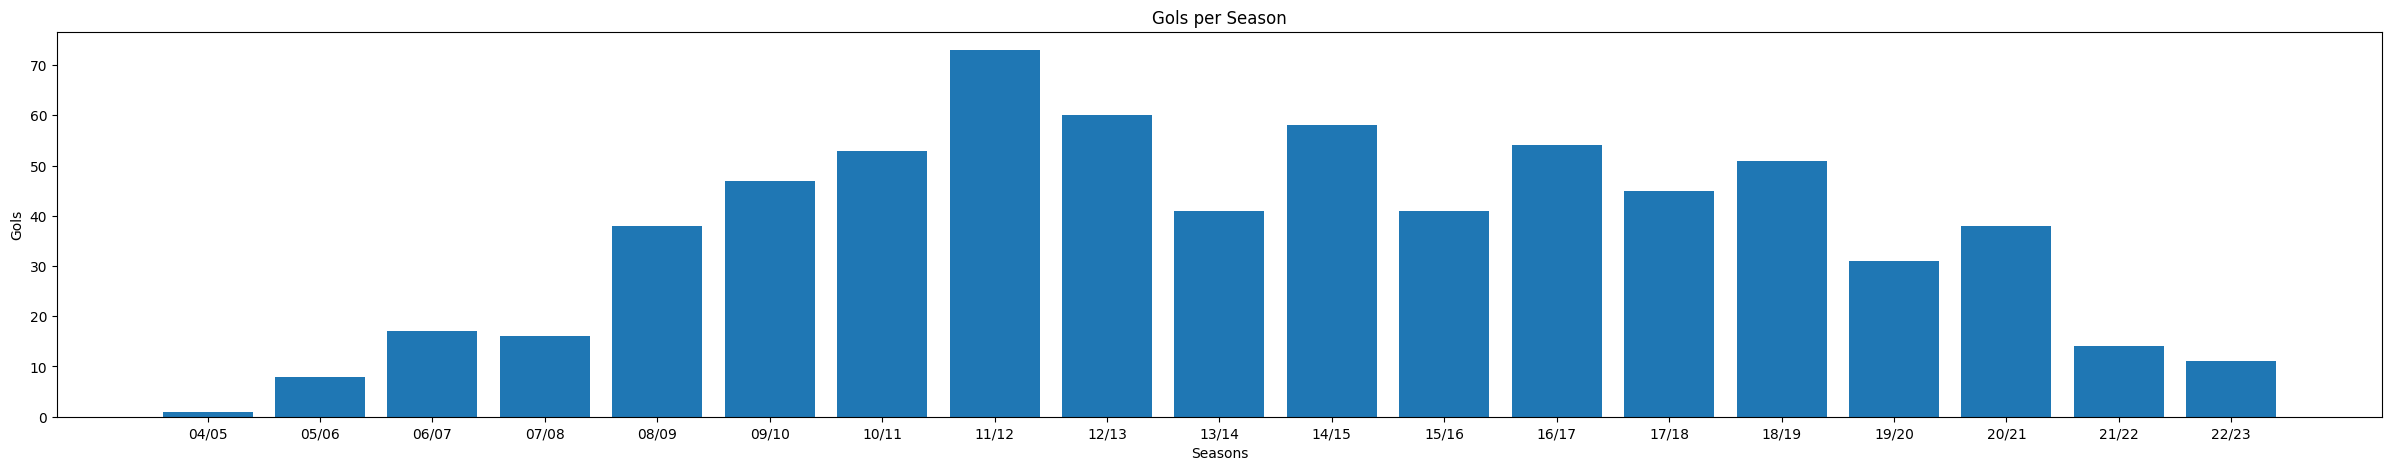

In [23]:
#ordem Cronológica
x = per_season['Season']
y = per_season['Gols']
plt.figure(figsize = (30,5))
plt.title('Gols per Season')
plt.xlabel('Seasons')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


## 6.4 Gols por Competição

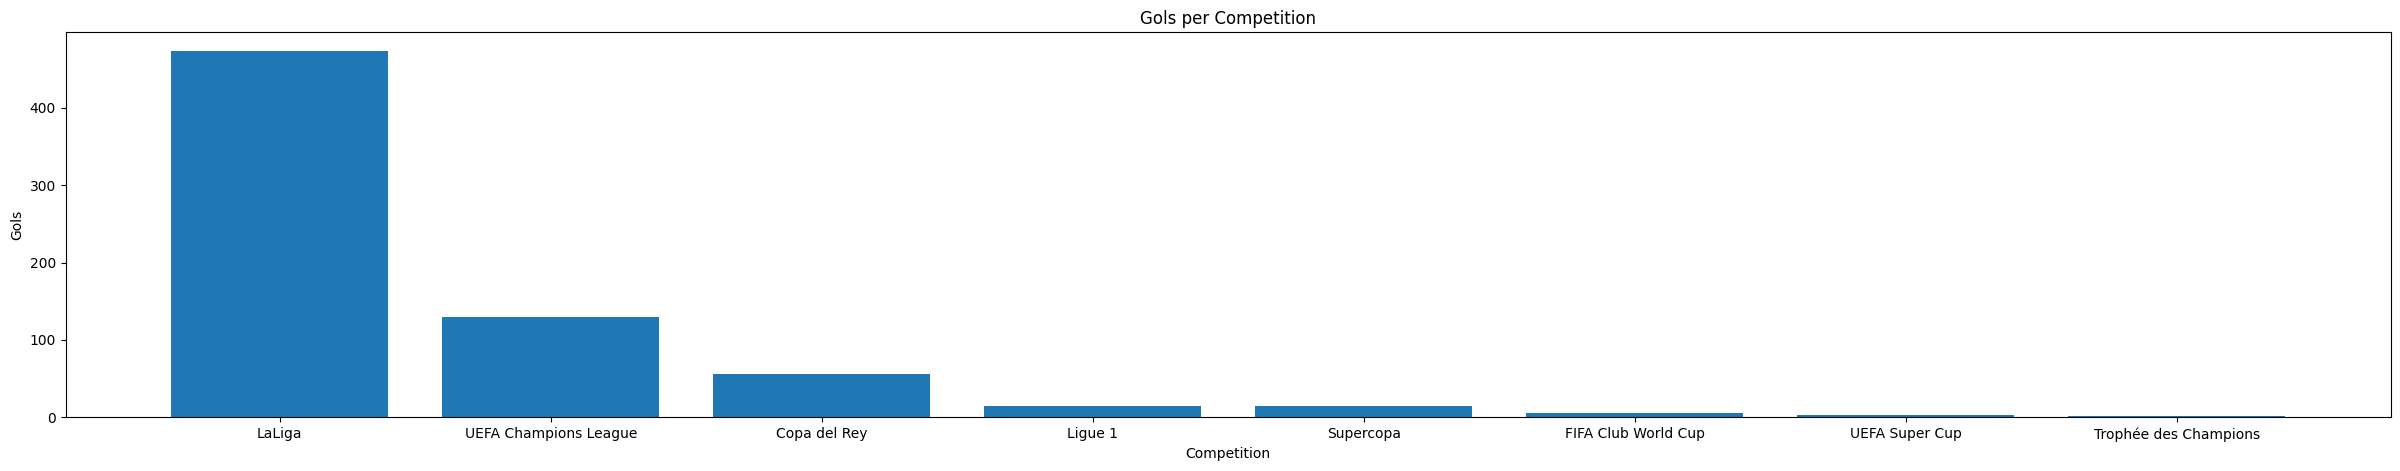

In [24]:
#ordem Cronológica
x = per_competition['Competition']
y = per_competition['Gols']
plt.figure(figsize = (30,5))
plt.title('Gols per Competition')
plt.xlabel('Competition')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


## 6.5 Gols por Oponente

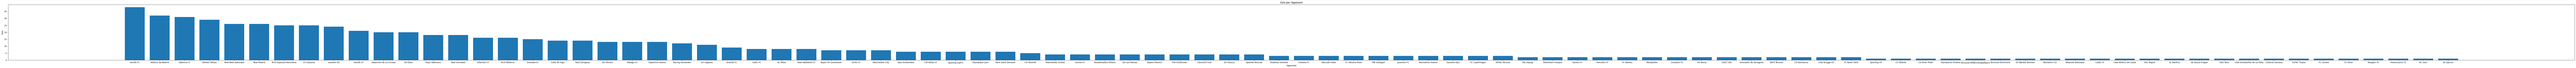

In [25]:
#ordem Cronológica
x = per_opponent['Opponent']
y = per_opponent['Gols']
plt.figure(figsize = (230,5))
plt.title('Gols per Opponent')
plt.xlabel('Opponent')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


## 6.6 Gols por Tipo

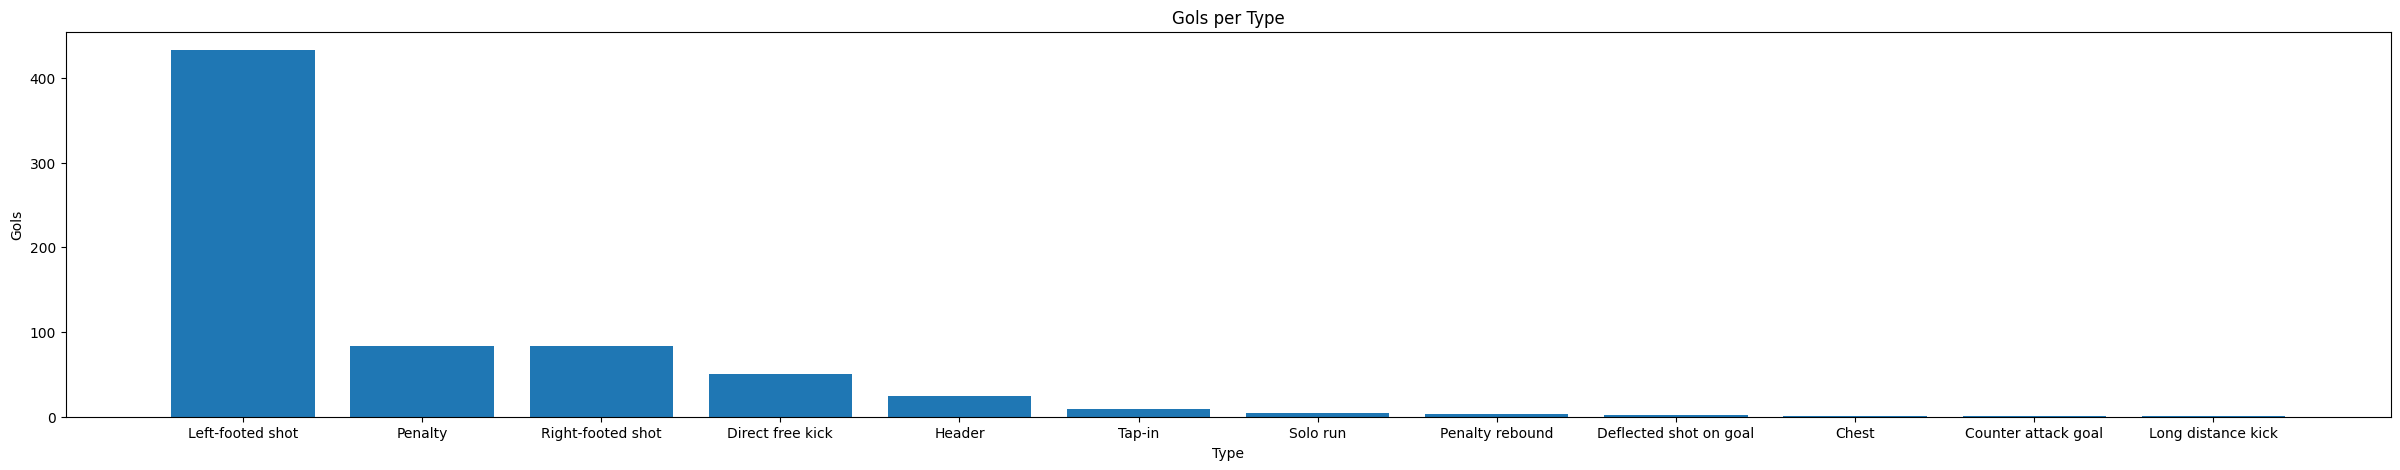

In [26]:
#ordem Cronológica
x = per_type['Type']
y = per_type['Gols']
plt.figure(figsize = (30,5))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


## 6.7 Gols por posição

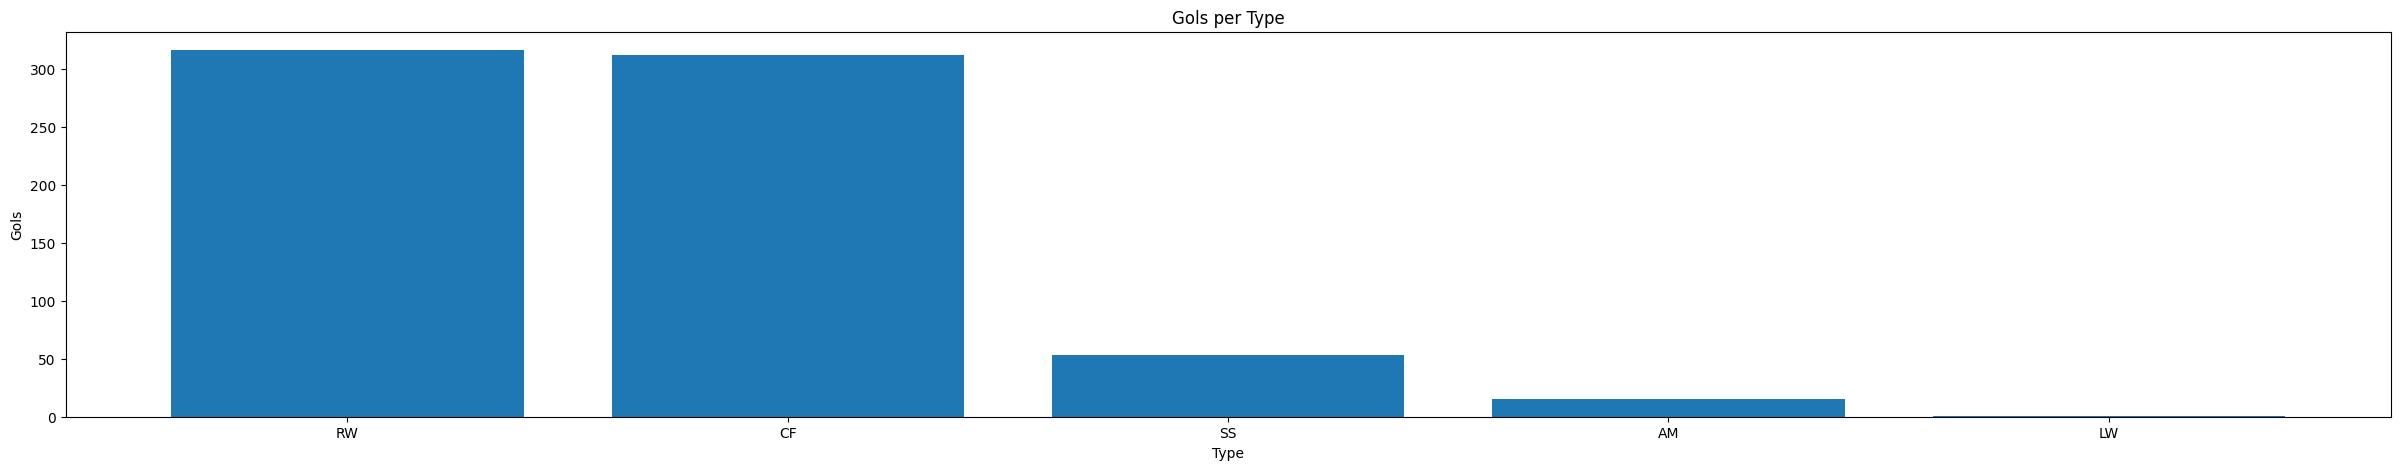

In [27]:
#ordem Cronológica
x = per_position['Position']
y = per_position['Gols']
plt.figure(figsize = (30,5))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


## 6.8 Gols por Jogador assistente

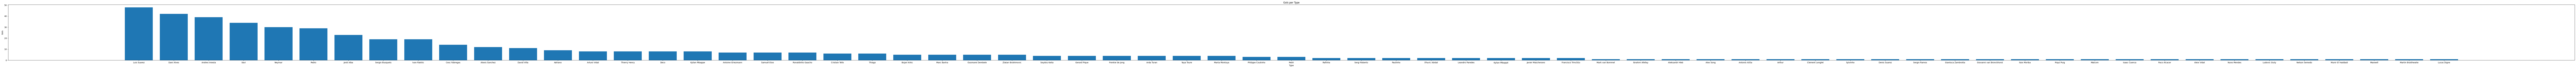

In [28]:
#ordem Cronológica
x = per_assist['Assist']
y = per_assist['Gols']
plt.figure(figsize = (230,5))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


## 6.9 Gols por Clube 

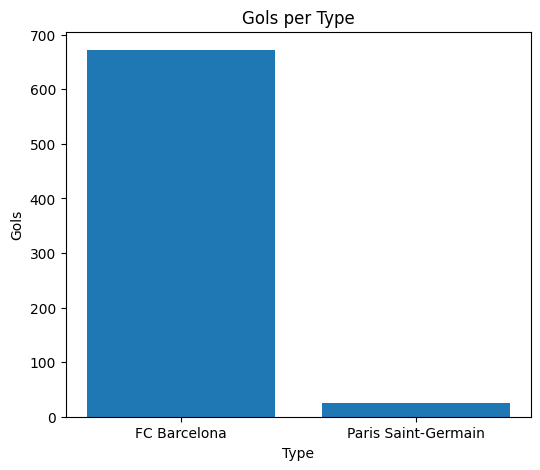

In [29]:
#ordem Cronológica
x = per_club['Club']
y = per_club['Gols']
plt.figure(figsize = (6,5))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


## 6.10 Gols por resultado final do jogo

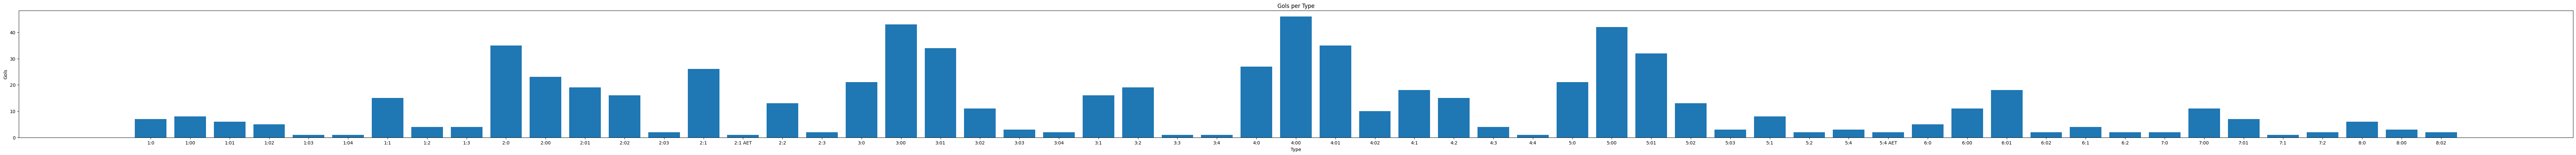

In [30]:
#ordem Cronológica
x = per_final_result['Result']
y = per_final_result['Gols']
plt.figure(figsize = (100,5))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


## 6.11 Gols por placar momentâneo do gol

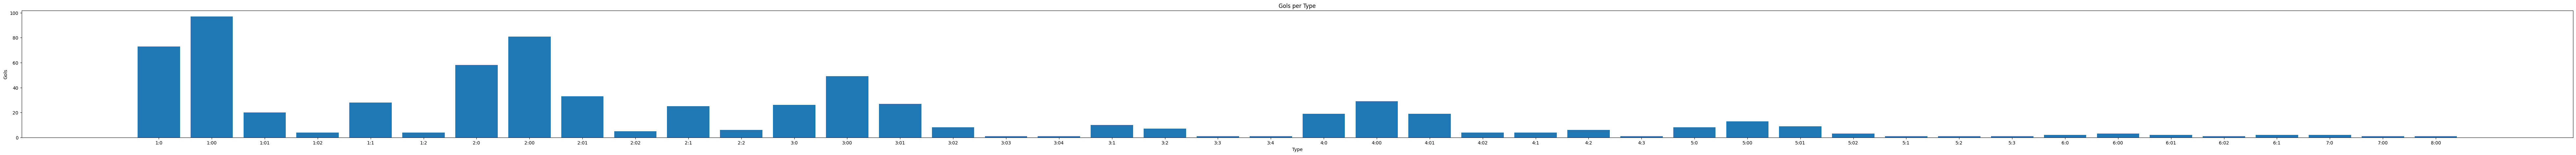

In [31]:
#ordem Cronológica
x = per_score_moment['At_score']
y = per_score_moment['Gols']
plt.figure(figsize = (100,5))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


## 6.12 Gols por minuto exato

## 6.13 Gols por local (H = Home; A: Away)

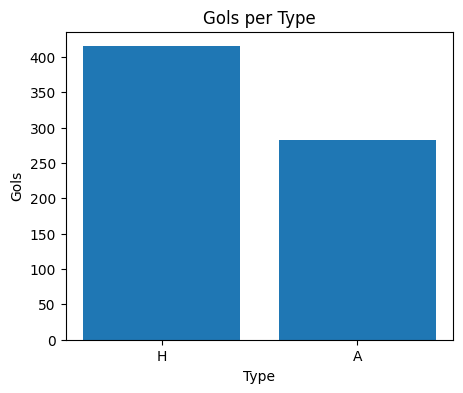

In [32]:
#ordem Cronológica
x = per_venue['Venue']
y = per_venue['Gols']
plt.figure(figsize = (5,4))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()
